In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("01 Oxidation.csv")
df2 = pd.read_csv("02 Photo_softbake.csv")
df3 = pd.read_csv("03 Photo_lithograpy.csv")
df4 = pd.read_csv("04 Etching.csv")
df5 = pd.read_csv("05 Ion_Implantation.csv")
df6 = pd.read_csv("06 Inspect.csv")

In [3]:
df = pd.merge(df1, df2, how='left', on=['No_Die','Lot_Num', 'Wafer_Num','Datetime'])
df = pd.merge(df, df3, how='left', on=['No_Die','Lot_Num', 'Wafer_Num','Datetime'])
df = pd.merge(df, df4, how='left', on=['No_Die','Lot_Num', 'Wafer_Num','Datetime'])
df = pd.merge(df, df5, how='left', on=['No_Die','Lot_Num', 'Wafer_Num','Datetime'])
df = pd.merge(df, df6, how='left', on=['No_Die','Lot_Num', 'Wafer_Num','Datetime'])

In [13]:
df.dropna(subset="Thin F2", inplace=True) # 다른 변수들과의 연관성을 찾지못함, 한 행에 여러 열들 결측값 가짐
pd.set_option('display.max_row', 200)
pd.set_option('display.max_columns', 200)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1702 entries, 0 to 1703
Data columns (total 57 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   No_Die               1702 non-null   object 
 1   Ox_Chamber           1702 non-null   int64  
 2   process              1702 non-null   object 
 3   type                 1702 non-null   object 
 4   Temp_OXid            1702 non-null   float64
 5   Vapor                1702 non-null   object 
 6   ppm                  1702 non-null   float64
 7   Pressure             1702 non-null   float64
 8   Oxid_time            1702 non-null   int64  
 9   thickness            1702 non-null   float64
 10  Lot_Num              1702 non-null   int64  
 11  Wafer_Num            1702 non-null   int64  
 12  Datetime             1702 non-null   object 
 13  photo_soft_Chamber   1702 non-null   int64  
 14  process 2            1702 non-null   object 
 15  resist_target        1702 non-null   f

In [6]:
df['Ox_Chamber'] = df['Ox_Chamber'].astype('str')
df['photo_soft_Chamber'] = df['photo_soft_Chamber'].astype('str')
df['lithography_Chamber'] = df['lithography_Chamber'].astype('str')
df['Etching_Chamber'] = df['Etching_Chamber'].astype('str')
df['Chamber_Num'] = df['Chamber_Num'].astype('str')

In [14]:
df['path'] = df['Ox_Chamber']+df['photo_soft_Chamber']+df['lithography_Chamber']+df['Etching_Chamber']+df['Chamber_Num']
df['path']

0       21111
1       21122
2       21133
3       21111
4       21122
        ...  
1699    33333
1700    11133
1701    11222
1702    11311
1703    12111
Name: path, Length: 1702, dtype: object

### 에러메시지 사용할 지 논의 필요

In [8]:
df[df['Error_message'] != 'none']['Error_message'].value_counts() # 에러 메시지 

[['Edge-Loc']]     57
[['Loc']]          29
[['Random']]       11
[['Center']]       10
[['Scratch']]       7
[['Near-full']]     4
[['Edge-Ring']]     4
Name: Error_message, dtype: int64

### 불필요한 열 제거 - 논의 필요

In [9]:
# # 불필요한 열 제거 
# df.drop(columns=["No_Die", "Lot_Num", "Wafer_Num", "Error_message","Wafer_map"], inplace=True)

In [9]:
# 시간 데이터 datetime 유형으로 변환
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%d-%m-%Y')

In [10]:
path_count = df['path'].value_counts()
path_count

22222    45
13222    43
32222    43
23222    43
21222    42
11222    41
31222    35
33222    34
12222    32
11311    30
12111    30
11133    30
13311    29
12333    29
22111    29
13333    29
21111    29
13111    29
12133    29
11333    29
12311    29
11111    29
21133    29
21311    29
21333    28
33333    26
33133    26
31311    26
31133    26
23333    26
23111    26
22311    26
32111    26
32133    26
33311    26
22333    26
23311    26
31111    26
32311    26
31333    26
33111    25
22133    24
13133    22
23133    20
32333    18
12122    12
12211    12
12233    12
12322    12
13122    12
13211    12
11322    12
11233    12
11211    12
11122    12
13233    12
22122    12
13322    12
21322    12
21122    12
21233    12
21211    12
22211    11
22233    11
31233     9
23233     9
22322     9
23122     9
23211     9
23322     9
31322     9
33322     9
33233     9
33211     9
33122     9
31122     9
32322     9
32233     9
32211     9
32122     9
31211     9
Name: path, dtype: int64

In [12]:
print(df['path'].values)

['21111' '21122' '21133' ... '11222' '11311' '12111']


In [32]:
path_sum = df.groupby('path')['Target'].sum()
path_sum 

path
11111    2703.0
11122     988.0
11133    2885.0
11211    1439.0
11222    3861.0
          ...  
33222    2525.0
33233     812.0
33311    2301.0
33322     601.0
33333    2665.0
Name: Target, Length: 81, dtype: float64

In [35]:
path_sum / (2000*path_count)

11111    0.046603
11122    0.041167
11133    0.048083
11211    0.059958
11222    0.047085
           ...   
33222    0.037132
33233    0.045111
33311    0.044250
33322    0.033389
33333    0.051250
Length: 81, dtype: float64

# 품질검사공정 이상치, 결측치

In [10]:
df6.drop(columns='Wafer_map',inplace=True)
df6

,No_Die,Lot_Num,Wafer_Num,Datetime,Target,Error_message
0,NOLSM325131325,13.0,28.0,09-01-2023,141.0,none
1,NOLSM326132326,13.0,29.0,09-01-2023,55.0,none
2,NOLSM327133327,13.0,30.0,09-01-2023,96.0,none
3,NOLSM328134328,13.0,31.0,09-01-2023,105.0,none
4,NOLSM329135329,13.0,32.0,09-01-2023,79.0,none
...,...,...,...,...,...,...
1699,NOLSM8483211,32.0,11.0,06-03-2023,78.0,none
1700,NOLSM8493212,32.0,12.0,06-03-2023,42.0,none
1701,NOLSM8503213,32.0,13.0,06-03-2023,42.0,none
1702,NOLSM8513214,32.0,14.0,06-03-2023,24.0,none


In [11]:
df6.isnull().sum()

No_Die           0
Lot_Num          0
Wafer_Num        0
Datetime         0
Target           0
Error_message    0
dtype: int64

In [12]:
df6.columns

Index(['No_Die', 'Lot_Num', 'Wafer_Num', 'Datetime', 'Target',
       'Error_message'],
      dtype='object')

<AxesSubplot: ylabel='Target'>

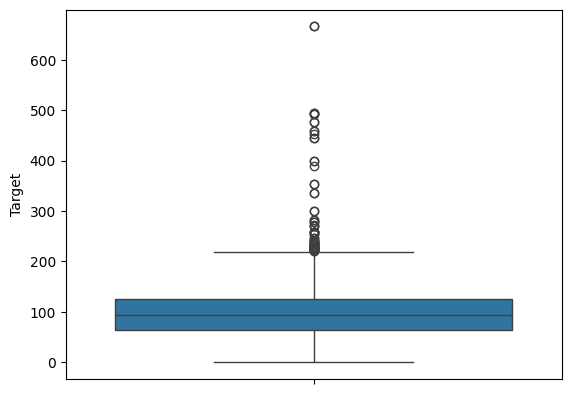

In [13]:
sns.boxplot(y='Target', data=df6) # 이상치가 보이는데 df에서 결측값 제거하면서 없어짐

In [14]:
df6[df6['Target']>580] # Thin F2 의 결측치 제거 과정에서 제거됨

,No_Die,Lot_Num,Wafer_Num,Datetime,Target,Error_message
1107,NOLSM703271703,27.0,28.0,01-03-2023,666.0,[['Loc']]
1161,NOLSM703271,27.0,1.0,01-03-2023,666.0,[['Loc']]


In [24]:
# 195이상 = 불량(1), 195미만 = 양품(0)
df.loc[df['Target'] >= 195, '불량'] =1
df.loc[df['Target'] < 195, '불량'] =0

In [29]:
df6['불량'].value_counts()

0.0    1580
1.0     124
Name: 불량, dtype: int64

In [23]:
df.head(1)

,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,Lot_Num,Wafer_Num,Datetime,photo_soft_Chamber,process 2,resist_target,N2_HMDS,pressure_HMDS,temp_HMDS,temp_HMDS_bake,time_HMDS_bake,spin1,spin2,spin3,photoresist_bake,temp_softbake,time_softbake,lithography_Chamber,Process 2-1,Line_CD,UV_type,Wavelength,Resolution,Energy_Exposure,Etching_Chamber,Process 3,Thin F4,Thin F3,Thin F2,Thin F1,Temp_Etching,Source_Power,Selectivity,Chamber_Num,process4,Flux60s,Flux90s,Flux160s,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target,Error_message,Wafer_map,path
0,NOLSM325131325,2,Oxidation,dry,1214.307948,O2,26.69,0.203,120,713.132,13,28,2023-01-09,1,Photo,1.46994,17.367,15.006,20.001,200.551,90.001,502.391,4017.144,4903.611,5.02,91.918,30.005,1,photo_li,41.676,I,365,505.388,109.628,1,Etching,340.0,1522.0,3644.0,5732.0,72.651,52.103,1.03,1,Implantation,1.500000e+16,1.320000e+17,6.470000e+17,3.010000e+17,6.000000e+17,30795.934,103.433,854.0,154,141.0,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,21111


df[(df['pressure_HMDS']==14.935) & (df['temp_HMDS']==19.999) & (df['time_HMDS_bake']==90.0)]

In [30]:
df['time_HMDS_bake'].value_counts()

90.000    882
90.001    422
89.999    328
90.002     38
89.998     31
90.003      1
Name: time_HMDS_bake, dtype: int64

In [38]:
df['RTA_Temp'].value_counts()

155    284
156    270
154    248
153    202
157    190
152    136
158     98
150     76
151     76
159     72
149     20
160     20
161      4
148      4
162      2
Name: RTA_Temp, dtype: int64